In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional



In [40]:
%store -r data
train = data[data.year < 2019]
valid = data[data.year >= 2019]

%store -r data_x
features = data_x.columns



In [41]:
X_train, X_valid, Y_train, Y_valid=train[features], valid[features], train["wind_generation_actual"], valid["wind_generation_actual"]
X_train, X_valid = np.array(X_train), np.array(X_valid)

X_train_array = np.asarray(X_train.reshape((X_train.shape[0], 1, X_train.shape[1])))
X_valid_array = np.asarray(X_valid.reshape(X_valid.shape[0], 1, X_valid.shape[1]))
Y_train_array = np.asarray(Y_train) 
Y_valid_array = np.asarray(Y_valid)

In [42]:
X_train.shape

(1462, 12)

In [43]:
X_valid_array.shape

(365, 1, 12)

In [44]:
ann_model = Sequential([
    Dense(32, activation="relu", input_shape=(1, X_train_array.shape[2])),
    Dense(8, activation="relu"),
    Dense(1)
    ])

In [45]:
ann_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(learning_rate = 0.001),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [46]:
history = ann_model.fit(X_train_array, Y_train_array, 
     validation_data=(X_valid_array, Y_valid_array),
     epochs=150, verbose=1, batch_size = 128)

Epoch 1/150
12/12 [==============================] - 1s 15ms/step - loss: 49658388480.0000 - root_mean_squared_error: 223391.4531 - val_loss: 55275802624.0000 - val_root_mean_squared_error: 234495.4531
Epoch 2/150
12/12 [==============================] - 0s 3ms/step - loss: 44342464512.0000 - root_mean_squared_error: 210728.4531 - val_loss: 51426762752.0000 - val_root_mean_squared_error: 226297.6406
Epoch 3/150
12/12 [==============================] - 0s 3ms/step - loss: 43558944768.0000 - root_mean_squared_error: 207984.1719 - val_loss: 52131905536.0000 - val_root_mean_squared_error: 227796.3906
Epoch 4/150
12/12 [==============================] - 0s 4ms/step - loss: 42765295616.0000 - root_mean_squared_error: 207458.7812 - val_loss: 50563072000.0000 - val_root_mean_squared_error: 224381.2344
Epoch 5/150
12/12 [==============================] - 0s 4ms/step - loss: 41882497024.0000 - root_mean_squared_error: 204689.4844 - val_loss: 49791586304.0000 - val_root_mean_squared_error: 222686

In [51]:
annforecast = ann_model.predict(X_valid_array)
valid["Forecast_ANN"] = annforecast.squeeze()


12/12 [==============================] - 0s 1ms/step


/tmp/ipykernel_302342/2966983431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Forecast_ANN"] = annforecast.squeeze()


<AxesSubplot:>

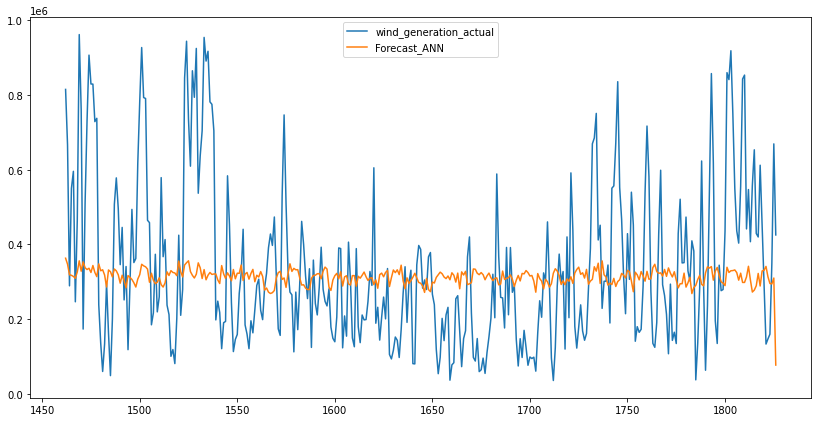

In [52]:
valid[["wind_generation_actual", "Forecast_ANN"]].plot(figsize=(14, 7))

In [49]:
ann_rmse = np.sqrt(mean_squared_error(valid["wind_generation_actual"], valid.Forecast_ANN))
ann_mae = mean_absolute_error(valid["wind_generation_actual"], valid.Forecast_ANN)

print("RMSE of ANN:", ann_rmse)
print("\nMAE of ANN:", ann_mae)

RMSE of ANN: 221027.93477058827

MAE of ANN: 173184.70894691782
